In [1]:
import numpy as np
import numpy.random as rn
import math as m
import matplotlib.pyplot as plt
from __future__ import division

G = 6.67e-11
R_jup = 7.785e+11
M_jup = 1.898e+27
V_jup = 1.3058e+4
M_sun = 1.989e+30
R_earth = 1.496e+11 #Smallest R for an asteroid

In [2]:
nbodies = 1
t_intervals = 10000
t_end = 100000000
bodieslist = ["Sun", "Jupiter"]
initcond = np.zeros((nbodies,7))
positions = {}
positions["Sun"] = np.array([0,0,0,0,0,0,M_sun]) #x,y,z,vx, vy, vz
positions["Jupiter"] = np.array([R_jup,0,0,0,V_jup,0,M_jup])

print positions

{'Sun': array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.98900000e+30]), 'Jupiter': array([  7.78500000e+11,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.30580000e+04,   0.00000000e+00,
         1.89800000e+27])}


In [3]:
def f12(Body1,Body2,position_1):
    if Body1 == Body2:
        return np.array([0,0,0])
    pos = position_1-positions[Body2][0:3]
    dist = np.linalg.norm(pos)
    return -G* positions[Body2][-1]*pos/(dist)**3

def force(Body1, position_1):
    F = 0
    for k in ["Jupiter", "Sun"]:
        F = F + f12(Body1, k, position_1)
    return F


def asteroid_init():
    
    for i in range(nbodies):
        theta = 2*m.pi*rn.random()        #Phase of the orbit
        r = rn.uniform(R_earth,R_jup)    #Radius of the asteroids between earth and jupiter orbit
        bodieslist.append("Body "+str(i+1))
        positions[bodieslist[i+2]] = np.array([r*m.cos(theta),r*m.sin(theta),0,(R_jup/r)*V_jup*m.cos(theta+m.pi/2),(R_jup/r)*V_jup*m.sin(theta+m.pi/2),0, 0])
        
    

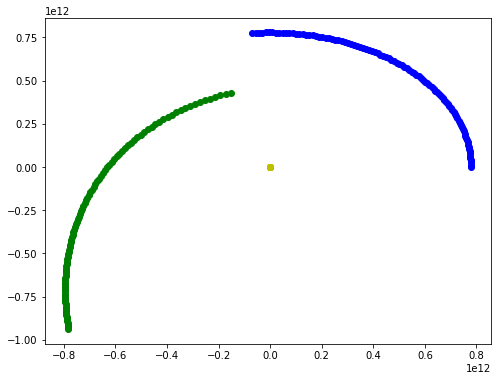

{'Sun': array([  8.21477842e+08,   5.07180967e+08,   0.00000000e+00,
         1.23832415e+01,   1.37828498e+01,   0.00000000e+00,
         1.98900000e+30]), 'Body 1': array([ -7.81127018e+11,  -9.48313596e+11,   0.00000000e+00,
         1.36246107e+03,  -1.13590190e+04,   0.00000000e+00,
         0.00000000e+00]), 'Jupiter': array([ -8.23191992e+10,   7.74229914e+11,   0.00000000e+00,
        -1.29757471e+04,  -1.38676056e+03,   0.00000000e+00,
         1.89800000e+27])}


In [4]:
def RK4_gravitational(Body, dt):
    
    k1 = np.concatenate((positions[Body][3:6], force(Body, positions[Body][:3]))) * dt
    k2 = np.concatenate((positions[Body][3:6] + k1[3:] * 0.5, force(Body, positions[Body][:3]  + k1[:3] * 0.5))) * dt
    k3 = np.concatenate((positions[Body][3:6] + k2[3:] * 0.5, force(Body, positions[Body][:3]  + k2[:3] * 0.5))) * dt
    k4 = np.concatenate((positions[Body][3:6] + k3[3:], force(Body, positions[Body][:3]  + k3[:3]))) * dt
    positions[Body][:6] = positions[Body][:6] + k1 / 6 + k2 / 3 + k3 / 3 + k4 / 6
    
    return positions[Body]


def integrator():
    condition = False     # We need a condition for getting rid of asteroids scaping from the system
    asteroid_init()
    dt = t_end / t_intervals
    plt.figure(figsize=(8,6))
    for i in range(t_intervals):
        for j, Body in enumerate(bodieslist):
            positions[Body] = RK4_gravitational(Body, dt)
            if condition == True:  #Eliminating from the list asteroids scaping
                bodielist.pop(i)
        if (i % 100) == 0:
            plt.plot(positions["Sun"][0], positions["Sun"][1], 'o', c = 'y') 
            plt.plot(positions["Jupiter"][0], positions["Jupiter"][1], 'o', c = 'b') 
            if(nbodies!=0): plt.plot(positions["Body 1"][0], positions["Body 1"][1], 'o', c = 'g')  
    plt.show()
    return positions


print integrator()